In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

In [3]:
class Source:
    def __init__(self,strength,x,y):
        self.strength=strength
        self.x, self.y=x,y
    def Velocity(self, X, Y):
        self.u = self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        self.v = self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
    def Streamfunction(self, X, Y):
        self.psi = self.strength/(2*math.pi)*numpy.arctan2((Y-self.y), (X-self.x))

In [4]:
strength_source = 1.0                  # strength of the source         
x_source, y_source = 0.0, 0.5 

source=Source(strength_source,x_source,y_source)
source.Velocity(X,Y)
source.Streamfunction(X,Y)

In [5]:
source_image=Source(strength_source,x_source,-y_source)
source_image.Velocity(X,Y)
source_image.Streamfunction(X,Y)

In [6]:
u=source.u+source_image.u
v=source.v+source_image.v
psi=source.psi+source_image.psi

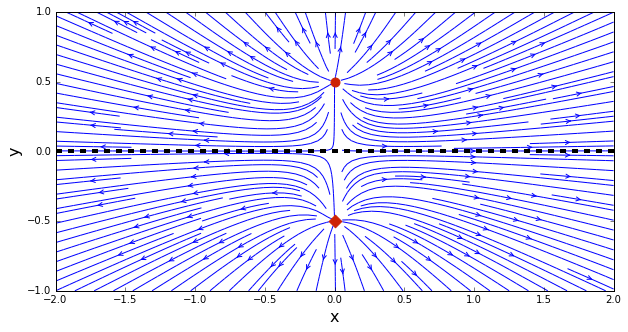

In [7]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(source.x, source.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(source_image.x, source_image.y, color='#CD2305', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

In [13]:
class Vortex:
    def __init__(self,strength,x,y):   
        self.strength=strength
        self.x,self.y=x,y
    def velocity(self,X,Y):
        self.u = +self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
        self.v = -self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
    def streamfunction(self,X,Y):
        self.psi = -self.strength/(4*math.pi)*numpy.log((X-self.x)**2+(Y-self.y)**2)

In [14]:
strength_vortex = 1.0                  # strength of the vortex
x_vortex, y_vortex = 0.0, 0.5  

vortex= Vortex(strength_vortex,x_vortex,y_vortex)
vortex.velocity(X,Y)
vortex.streamfunction(X,Y)

vortex_image=Vortex(-strength_vortex,x_source,-y_source)
vortex_image.velocity(X,Y)
vortex_image.streamfunction(X,Y)

In [15]:
u=vortex.u+vortex_image.u
v=vortex.v+vortex_image.v
psi=vortex.psi+vortex_image.psi

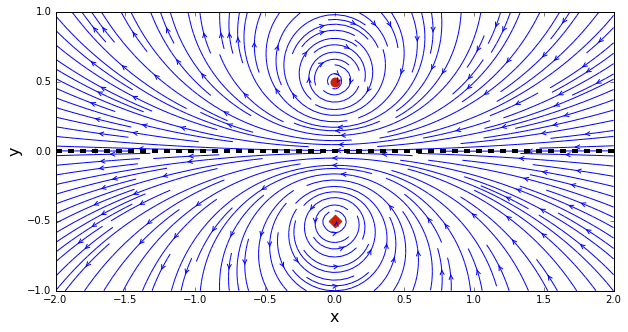

In [16]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex.x, vortex.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex_image.x, vortex_image.y, color='#CD2305', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

In [17]:
strength_vortex = 1.0                  # absolute value of each vortex strength
x_vortex1, y_vortex1 = -0.1, 0.5       # location of the first vortex
x_vortex2, y_vortex2 = +0.1, 0.5       # location of the second vortex

vortex1=Vortex(strength_vortex,x_vortex1,y_vortex1)
vortex1.velocity(X,Y)
vortex1.streamfunction(X,Y)

vortex2=Vortex(-strength_vortex,x_vortex2,y_vortex2)
vortex2.velocity(X,Y)
vortex2.streamfunction(X,Y)

vortex1_image=Vortex(strength_vortex,x_vortex1,-y_vortex1)
vortex1_image.velocity(X,Y)
vortex1_image.streamfunction(X,Y)

vortex2_image=Vortex(-strength_vortex,x_vortex2,-y_vortex2)
vortex2_image.velocity(X,Y)
vortex2_image.streamfunction(X,Y)

In [18]:
u=vortex1.u+vortex1_image.u+vortex2.u+vortex2_image.u
v=vortex1.v+vortex1_image.v+vortex2.v+vortex2_image.v
psi=vortex1.psi+vortex1_image.psi+vortex2.psi+vortex2_image.psi

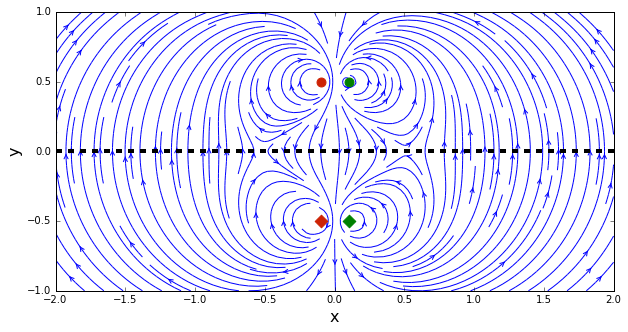

In [19]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex1.x, vortex1.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex2.x, vortex2.y, color='g', s=80, marker='o')
pyplot.scatter(vortex1_image.x, vortex1_image.y, color='#CD2305', s=80, marker='D')
pyplot.scatter(vortex2_image.x, vortex2_image.y, color='g', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

In [20]:
u_inf = 1.0    # free-stream speed

# calculate the velocity and stream-function of the free-stream flow
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y

In [21]:
class Doublet:
    def __init__(self,strength,x,y):
        self.strength=strength
        self.x,self.y=x,y
    def velocity(self,X,Y):
        self.u = -self.strength/(2*math.pi)*\
                ((X-self.x)**2-(Y-self.y)**2)/((X-self.x)**2+(Y-self.y)**2)**2
        self.v = -self.strength/(2*math.pi)*\
                2*(X-self.x)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)**2
    def streamfunction(self,X,Y):
        self.psi = -self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)

In [22]:
strength_doublet = 1.0                # strength of the doublet
x_doublet, y_doublet = 0.0, 0.3       # location of the doublet

doublet=Doublet(strength_doublet,x_doublet,y_doublet)
doublet.velocity(X,Y)
doublet.streamfunction(X,Y)

doublet_image=Doublet(strength_doublet,x_doublet,-y_doublet)
doublet_image.velocity(X,Y)
doublet_image.streamfunction(X,Y)

In [23]:
u=doublet.u+doublet_image.u+u_freestream
v=doublet.v+doublet_image.v+v_freestream
psi=doublet.psi+doublet_image.psi+psi_freestream

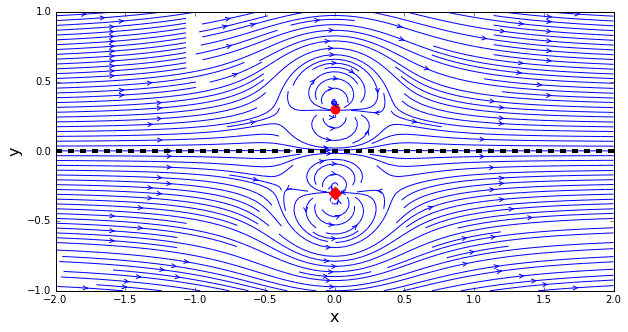

In [24]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(doublet.x, doublet.y, color='r', s=80, marker='o')
pyplot.scatter(doublet_image.x, doublet_image.y, color='r', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);